In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load mnist dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

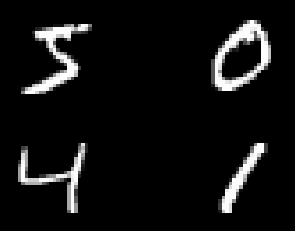

In [3]:
# plot the first 4 images
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [4]:
# flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)



In [5]:
#normalize inputs
X_train = X_train/255
X_test = X_test/255


In [6]:
# one hot encode y labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
# build model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=['accuracy']
)

In [8]:
#fit model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4229 - accuracy: 0.8773 - val_loss: 0.2710 - val_accuracy: 0.9192
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2392 - accuracy: 0.9304 - val_loss: 0.2137 - val_accuracy: 0.9391
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2064 - accuracy: 0.9391 - val_loss: 0.1925 - val_accuracy: 0.9441
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1868 - accuracy: 0.9437 - val_loss: 0.1803 - val_accuracy: 0.9453
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1746 - accuracy: 0.9470 - val_loss: 0.1784 - val_accuracy: 0.9463
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1656 - accuracy: 0.9498 - val_loss: 0.1734 - val_accuracy: 0.9481
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1569 - accuracy: 0.9520 - val_loss: 0.1751 - val_accuracy:

# Implementing CNN

In [9]:
# load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [10]:
# reshape dataset
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [11]:
#normalize input
X_train = X_train/255
X_test = X_test/255


In [12]:
# one hot encode labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [13]:
# Build second model

modelCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelCNN.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 9,204
Trainable params: 9,204
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the model with validation

modelCNN.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: in user code:

    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\p2004176\.conda\envs\DELE\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (32, 784)


In [ ]:
modelCNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [ ]:
# load mnist dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

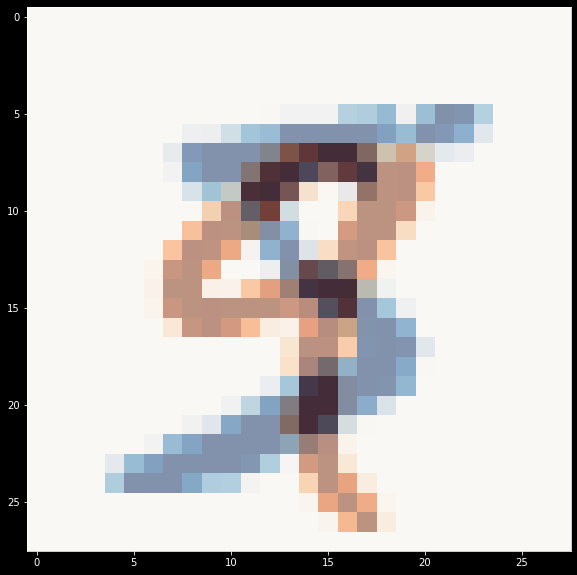

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(X_train[0], cmap="Blues")
plt.imshow(X_train[4], cmap="Oranges", alpha=0.5)

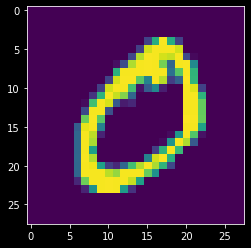

In [ ]:
plt.imshow(X_train[1])

In [20]:
# Larger CNN Model
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# from keras import backend as K

# K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 88
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])



# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))



Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2959 - accuracy: 0.9128 - val_loss: 0.0644 - val_accuracy: 0.9786
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0431 - val_accuracy: 0.9867
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0386 - val_accuracy: 0.9880
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0302 - val_accuracy: 0.9899
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0269 - val_accuracy: 0.9915
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0271 - val_accuracy: 0.9913
Epoch 